In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import roc_auc_score
plt.style.use('dark_background')

plt.rcParams['figure.figsize'] = [12, 12]  # Default values
plt.rcParams['font.size']=14

# First I read in the known subdwarf catalog plus the selection from nikolai. 99.5% prob and T>10Kk

In [5]:
df=pd.read_csv("../catalog.csv")
df2=df.drop(columns="source_id")

In [32]:
df.columns

Index(['source_id', 'l', 'b', 'parallax', 'pmra', 'pmdec', 'phot_g_mean_mag',
       'phot_bp_mean_mag', 'phot_rp_mean_mag', 'ra_error', 'dec_error',
       'parallax_error', 'pmra_error', 'pmdec_error', 'ruwe',
       'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_n_bad_obs_al',
       'astrometric_n_good_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_obs_al', 'astrometric_sigma5d_max', 'bp_g', 'bp_rp',
       'dec_parallax_corr', 'dec_pmdec_corr', 'dec_pmra_corr',
       'dec_pseudocolour_corr', 'g_rp', 'ipd_frac_multi_peak',
       'ipd_frac_odd_win', 'ipd_gof_harmonic_amplitude',
       'ipd_gof_harmonic_phase', 'matched_transits',
       'nu_eff_used_in_astrometry', 'parallax_over_error',
       'parallax_pmdec_corr', 'parallax_pmra_corr',
       'parallax_pseudocolour_corr', 'phot_bp_mean_flux',
       'phot_bp_mean_flux_error', 'phot_bp_mean_flux_over_error',
       'phot_bp_n_blended_transits', 'phot_bp_n_contamina

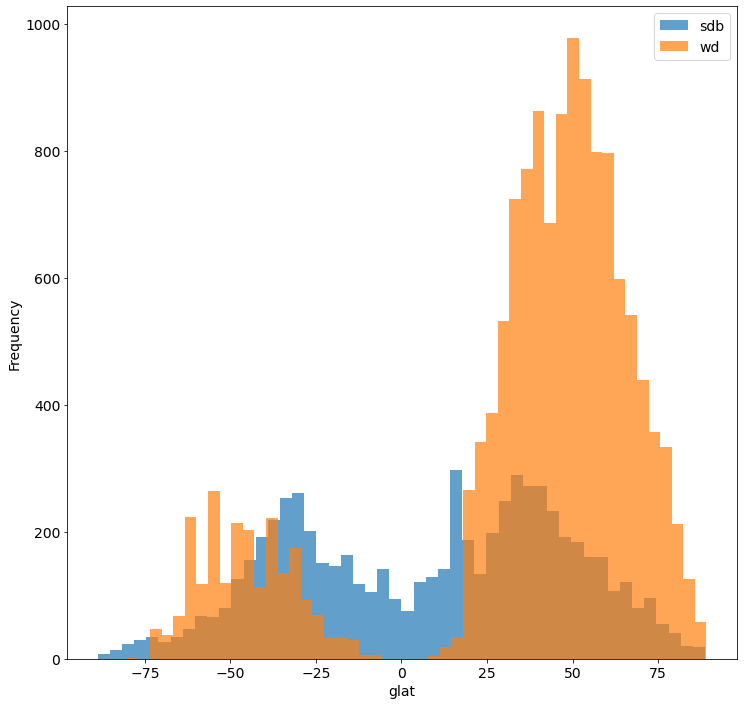

In [6]:
# Separate data into two classes
class_0_data = df[df['class'] == "sdb"]['b']
class_1_data = df[df['class'] == "wd"]['b']

# Plot histograms for each class
plt.hist(class_0_data, bins=50, alpha=0.7, label='sdb')
plt.hist(class_1_data, bins=50, alpha=0.7, label='wd')

# Add labels and title
plt.xlabel('glat')
plt.ylabel('Frequency')
# Add legend
plt.legend()


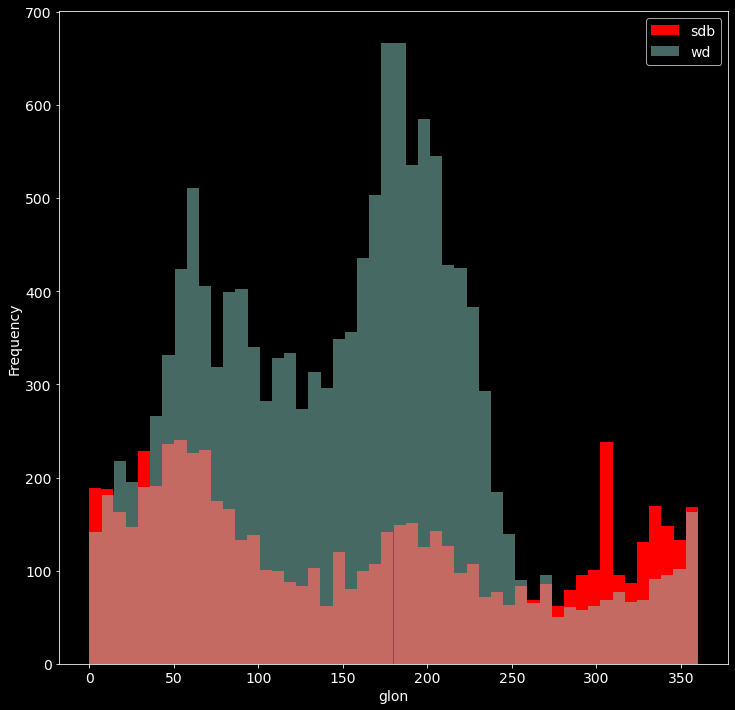

In [8]:
# Separate data into two classes
class_0_lon_data = df[df['class'] == "sdb"]['l']
class_1_lon_data = df[df['class'] == "wd"]['l']

# Plot histograms for each class
plt.hist(class_0_lon_data, bins=50, alpha=1, label='sdb',color="red")
plt.hist(class_1_lon_data, bins=50, alpha=0.5, label='wd')

# Add labels and title
plt.xlabel('glon')
plt.ylabel('Frequency')
# Add legend
plt.legend()


In [9]:
# Define a mapping from class names to binary values
class_mapping = {'sdb': 0, 'wd': 1}

# Create a new column with binary values
df['binary_class'] = df['class'].map(class_mapping)

In [10]:
# Count the number of NaN values per column
nan_count = df.isna().sum()

# Display the count of NaN values per column
columns_with_high_nan_count = set(nan_count[nan_count > 134].index)
print(columns_with_high_nan_count)

{'pmdec_pseudocolour_corr', 'pseudocolour_error', 'nu_eff_used_in_astrometry', 'pseudocolour', 'pmra_pseudocolour_corr', 'parallax_pseudocolour_corr', 'ra_pseudocolour_corr', 'dec_pseudocolour_corr'}


In [11]:
shuffled_df = df.sample(frac=1, random_state=42)
shuffled_df=shuffled_df.drop(columns={"class","source_id","phot_rp_n_contaminated_transits","phot_rp_n_blended_transits"})
shuffled_df=shuffled_df.drop(columns=columns_with_high_nan_count)
shuffled_df = shuffled_df.dropna(axis=0)
shuffled_df

,l,b,parallax,pmra,pmdec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,ra_error,dec_error,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_n_obs,pm,pmra_pmdec_corr,ra_dec_corr,ra_parallax_corr,ra_pmdec_corr,ra_pmra_corr,binary_class
2300,253.612943,59.727567,0.899569,-34.345126,8.801821,14.209691,14.079927,14.381718,0.032387,0.026294,...,33.109837,423.169220,32,35.455040,-0.176083,-0.074879,-0.291328,0.281987,0.009282,0
15405,117.819220,50.221268,1.787600,7.801751,-5.178012,19.165289,19.102810,19.326143,0.164052,0.141473,...,5.947481,24.795216,43,9.363713,0.034168,-0.017213,-0.244350,0.101234,-0.164070,1
4148,55.884952,41.804814,0.137578,-3.719678,-6.786140,17.156624,17.025812,17.449652,0.041731,0.047487,...,7.219554,115.023670,55,7.738714,0.175522,0.085877,0.061313,0.037267,-0.124353,0
6417,320.541748,-50.494277,0.725354,7.416283,-17.467014,14.263230,14.097664,14.582043,0.026280,0.027945,...,13.249134,879.333440,57,18.976244,-0.423476,-0.281311,0.153347,0.121369,-0.089179,0
9163,217.031477,23.269225,2.268733,-2.646380,-29.771223,18.335403,18.193182,18.531004,0.163451,0.109230,...,13.152844,23.320465,27,29.888610,-0.350071,-0.185464,-0.283647,0.443136,-0.173482,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,156.895448,45.116947,7.932494,19.711097,16.701936,17.467220,17.501420,17.474068,0.058871,0.050736,...,6.458243,125.723640,57,25.835672,0.120371,0.052766,-0.113606,0.183422,-0.087931,1
11964,231.050419,47.522764,3.107008,-13.444760,-4.220827,18.196442,18.139456,18.394217,0.168185,0.135444,...,12.629606,27.547487,23,14.091734,-0.320350,-0.238423,-0.376714,0.103127,-0.086481,1
5390,34.026493,-25.390256,1.420549,-4.906713,-17.953092,13.632751,13.503982,13.875936,0.036354,0.027579,...,44.146526,505.693630,29,18.611538,0.396967,0.299959,0.096481,-0.186462,-0.135288,0
860,263.467260,-39.631277,0.397201,4.904999,1.365343,16.301119,16.162899,16.592438,0.048822,0.046325,...,7.829537,233.585980,39,5.091481,-0.248681,-0.006144,0.430093,-0.194904,-0.014610,0


In [12]:
X = shuffled_df.drop('binary_class', axis=1)  # Features


In [13]:
y = shuffled_df['binary_class']  # Target variable


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
best_max_depth = None
best_roc_auc = 0

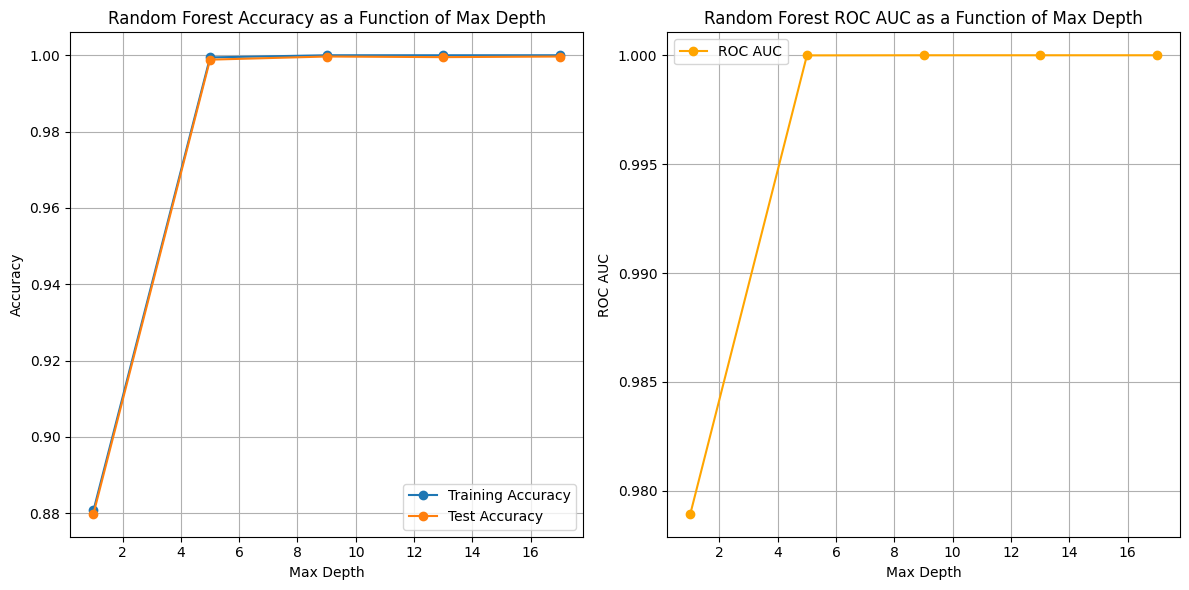

Best Max Depth: 17 | Best ROC AUC: 1.0000


In [17]:
# Define a range of max_depth values to test
max_depth_values = np.arange(1, 21,4)
plt.style.use('default')

# Initialize lists to store accuracy values for each max_depth
train_accuracies = []
test_accuracies = []
roc_auc_values = []

# Iterate over max_depth values
for max_depth in max_depth_values:
    # Create and fit the Random Forest classifier
    clf = RandomForestClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predict on the training and test sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate and store accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    # Calculate ROC AUC
    y_train_proba = clf.predict_proba(X_train)[:, 1]
    y_test_proba = clf.predict_proba(X_test)[:, 1]
    roc_auc_train = roc_auc_score(y_train, y_train_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)

  
    roc_auc_values.append(roc_auc_test)

    # Check if current max_depth gives better ROC AUC on the test set
    if roc_auc_test > best_roc_auc:
        best_roc_auc = roc_auc_test
        best_max_depth = max_depth

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy as a Function of Max Depth')
plt.legend()
plt.grid(True)

# Plot ROC AUC
plt.subplot(1, 2, 2)
plt.plot(max_depth_values, roc_auc_values, label='ROC AUC', marker='o', color='orange')
plt.xlabel('Max Depth')
plt.ylabel('ROC AUC')
plt.title('Random Forest ROC AUC as a Function of Max Depth')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Best Max Depth: {best_max_depth} | Best ROC AUC: {best_roc_auc:.4f}")



In [18]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [19]:
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
                            Feature  Importance
2                          parallax    0.255290
33              parallax_over_error    0.118614
48                phot_rp_mean_flux    0.070273
6                  phot_bp_mean_mag    0.068000
7                  phot_rp_mean_mag    0.066569
36                phot_bp_mean_flux    0.053868
52                               pm    0.045679
43                 phot_g_mean_flux    0.040430
50     phot_rp_mean_flux_over_error    0.030422
44           phot_g_mean_flux_error    0.030219
38     phot_bp_mean_flux_over_error    0.023987
10                   parallax_error    0.021206
5                   phot_g_mean_mag    0.019024
12                      pmdec_error    0.016462
9                         dec_error    0.014877
21          astrometric_sigma5d_max    0.014185
3                              pmra    0.013338
4                             pmdec    0.010806
37          phot_bp_mean_flux_error    0.009164
11                 

In [20]:
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature']


In [21]:
print(selected_features)

2                         parallax
33             parallax_over_error
48               phot_rp_mean_flux
6                 phot_bp_mean_mag
7                 phot_rp_mean_mag
36               phot_bp_mean_flux
52                              pm
43                phot_g_mean_flux
50    phot_rp_mean_flux_over_error
44          phot_g_mean_flux_error
38    phot_bp_mean_flux_over_error
10                  parallax_error
5                  phot_g_mean_mag
12                     pmdec_error
9                        dec_error
21         astrometric_sigma5d_max
3                             pmra
4                            pmdec
Name: Feature, dtype: object


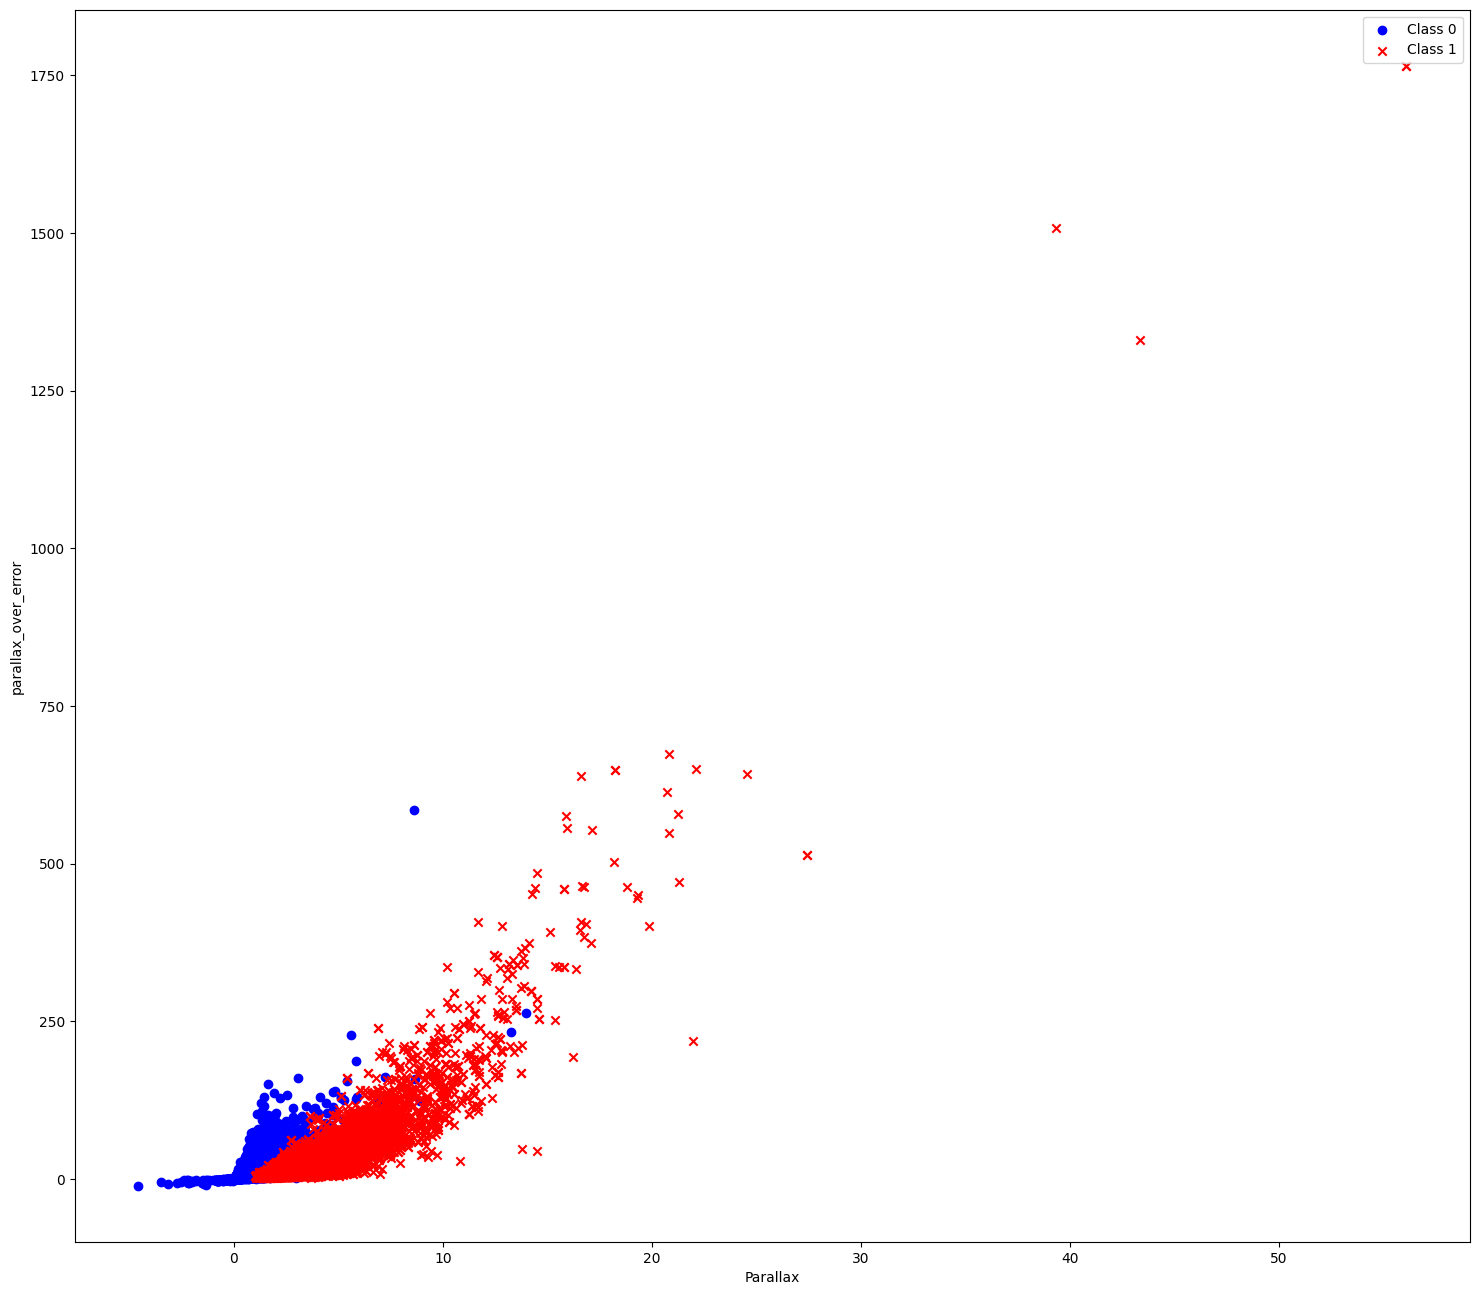

In [22]:

# Separate the data by class
class_0 = df[df['binary_class'] == 0]
class_1 = df[df['binary_class'] == 1]
plt.figure(figsize=(18, 16))

# Create a scatter plot for each class
plt.scatter(class_0['parallax'], class_0['parallax_over_error'], label='Class 0', c='blue', marker='o')
plt.scatter(class_1['parallax'], class_1['parallax_over_error'], label='Class 1', c='red', marker='x')

# Set labels and legend
plt.xlabel('Parallax')
plt.ylabel('parallax_over_error')
plt.legend()

In [23]:
# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9995069033530573
Confusion Matrix:
[[1976    3]
 [   0 4105]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1979
           1       1.00      1.00      1.00      4105

    accuracy                           1.00      6084
   macro avg       1.00      1.00      1.00      6084
weighted avg       1.00      1.00      1.00      6084



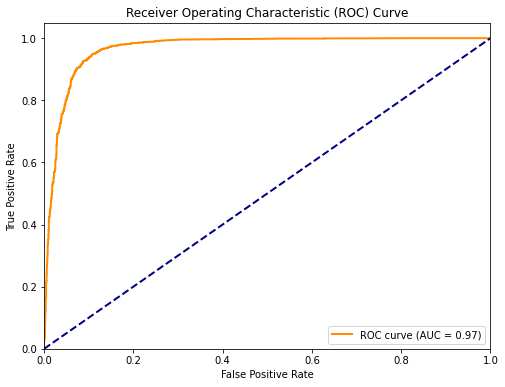

In [107]:
# Predict probabilities for class 1 (positive class)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# From here I start some predictions on Rick's catalog

In [54]:
df_rick=pd.read_csv("../catalog_rick.csv")

In [55]:
key_df_rick_unknown=(df_rick["source_id"].isin(df[df['class'] == "sdb"]["source_id"])==False)

In [56]:
df_rick_unknown=df_rick[key_df_rick_unknown]

In [57]:
df_rick_unknown=df_rick_unknown[X.columns]

In [58]:
# Count the number of NaN values per column
nan_count = df_rick_unknown.isna().sum()

# Display the count of NaN values per column
columns_with_high_nan_count = set(nan_count[nan_count > 1].index)
print(columns_with_high_nan_count)

set()


In [59]:
clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(X, y)
df_rick_unknown["pred"] = clf.predict(df_rick_unknown)
prob=clf.predict_proba(df_rick_unknown.drop(columns={"pred"}))
df_rick_unknown["sdb_proba"] = prob[:,0]
df_rick_unknown["wd_proba"] = prob[:,1]

In [60]:
key_sdb=df_rick_unknown["pred"]==0
key_wd=df_rick_unknown["pred"]==1

In [61]:
key_sdb.value_counts()

True     47353
False     9296
Name: pred, dtype: int64

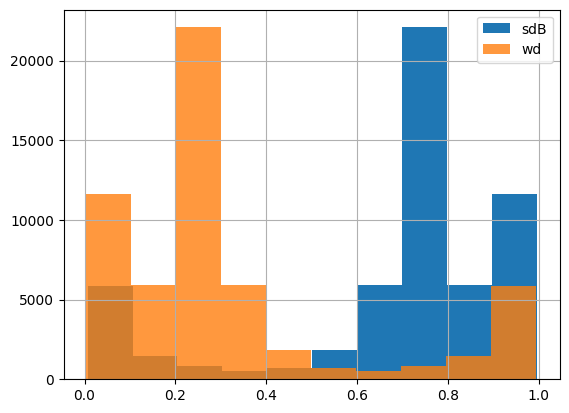

In [62]:
df_rick_unknown["sdb_proba"].hist()
df_rick_unknown["wd_proba"].hist(alpha=0.8)
plt.legend(["sdB","wd"])

Text(0.5, 0, 'glat')

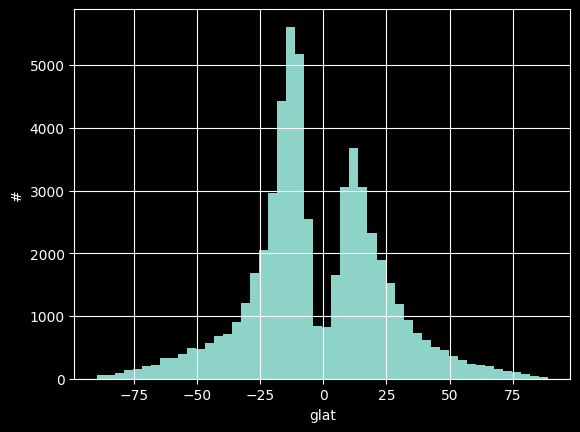

In [97]:
df_rick_unknown["b"].hist(bins=50)
plt.ylabel("#")
plt.xlabel("glat")

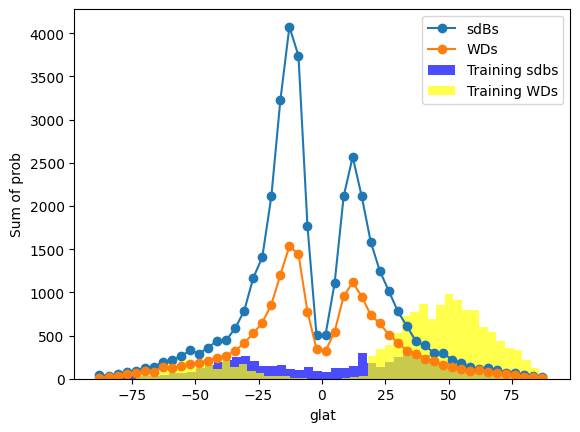

In [64]:
nbins = 50  # Adjust this to the desired number of bins
df_rick_unknown['glat_bin'] = pd.cut(df_rick_unknown['b'], bins=nbins)
bin_sum = df_rick_unknown.groupby('glat_bin')['sdb_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
bin_sum = df_rick_unknown.groupby('glat_bin')['wd_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
# Plot histograms for each class
plt.hist(class_0_data, bins=50, alpha=0.7, label='sdb',color="blue")
plt.hist(class_1_data, bins=50, alpha=0.7, label='wd',color="yellow")
plt.xlabel('glat')
plt.ylabel('Sum of prob')
plt.legend(["sdBs","WDs","Training sdbs","Training WDs"])
plt.grid(False)
plt.show()

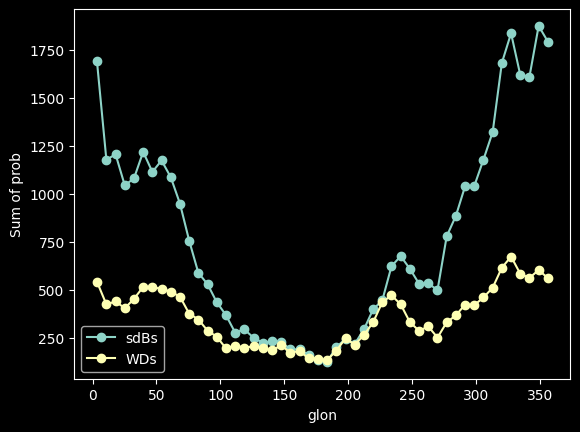

In [65]:
plt.style.use('dark_background')
nbins = 50  # Adjust this to the desired number of bins
df_rick_unknown['glon_bin'] = pd.cut(df_rick_unknown['l'], bins=nbins)
bin_sum = df_rick_unknown.groupby('glon_bin')['sdb_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
bin_sum = df_rick_unknown.groupby('glon_bin')['wd_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
plt.xlabel('glon')
plt.ylabel('Sum of prob')
plt.legend(["sdBs","WDs","Training sdbs","Training WDs"])
plt.grid(False)
plt.show()

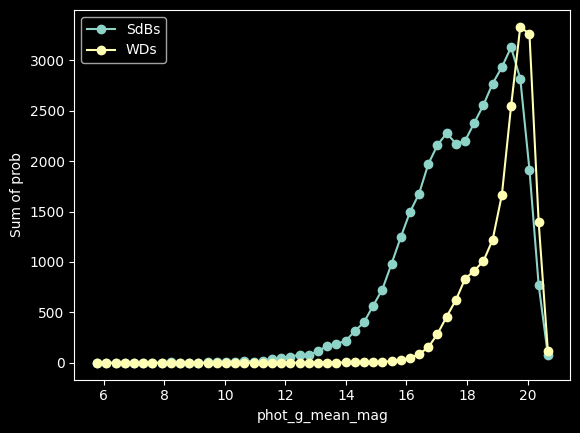

In [66]:
nbins = 50  # Adjust this to the desired number of bins
df_rick_unknown['phot_g_mean_mag_bin'] = pd.cut(df_rick['phot_g_mean_mag'], bins=nbins)
bin_sum = df_rick_unknown.groupby('phot_g_mean_mag_bin')['sdb_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
bin_sum = df_rick_unknown.groupby('phot_g_mean_mag_bin')['wd_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
plt.xlabel('phot_g_mean_mag')
plt.ylabel('Sum of prob')
plt.legend(["SdBs","WDs"])
plt.grid(False)
plt.show()

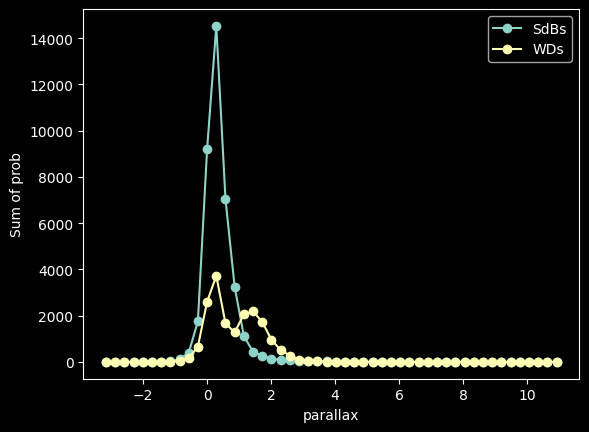

In [67]:
nbins = 50  # Adjust this to the desired number of bins
df_rick_unknown['parallax_bin'] = pd.cut(df_rick_unknown['parallax'], bins=nbins)
bin_sum = df_rick_unknown.groupby('parallax_bin')['sdb_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
bin_sum = df_rick_unknown.groupby('parallax_bin')['wd_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
plt.xlabel('parallax')
plt.ylabel('Sum of prob')
plt.legend(["SdBs","WDs"])
plt.grid(False)
plt.show()

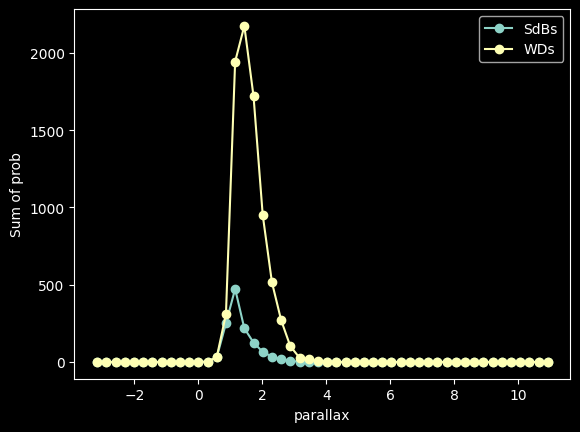

In [68]:
nbins = 50  # Adjust this to the desired number of bins
bin_sum = df_rick_unknown[key_wd].groupby('parallax_bin')['sdb_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
bin_sum = df_rick_unknown[key_wd].groupby('parallax_bin')['wd_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
plt.xlabel('parallax')
plt.ylabel('Sum of prob')
plt.legend(["SdBs","WDs"])
plt.grid(False)
plt.show()

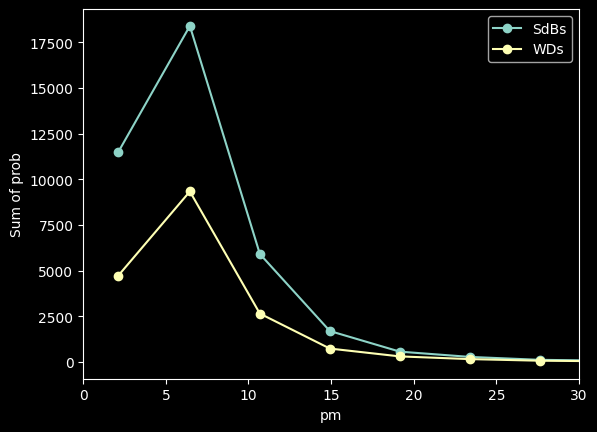

In [69]:
nbins = 50  # Adjust this to the desired number of bins
df_rick_unknown['pm_bin'] = pd.cut(df_rick_unknown['pm'], bins=nbins)
bin_sum = df_rick_unknown.groupby('pm_bin')['sdb_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
bin_sum = df_rick_unknown.groupby('pm_bin')['wd_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
plt.xlabel('pm')
plt.xlim(0,30)
plt.ylabel('Sum of prob')
plt.legend(["SdBs","WDs"])
plt.grid(False)
plt.show()

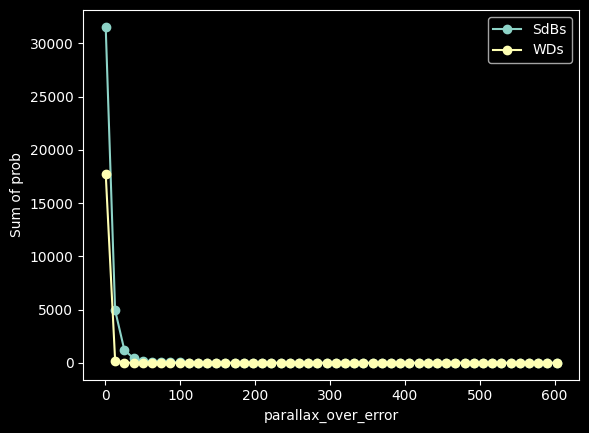

In [71]:
nbins = 50  # Adjust this to the desired number of bins
df_rick_unknown['parallax_over_error_bin'] = pd.cut(df_rick_unknown['parallax_over_error'], bins=nbins)
bin_sum = df_rick_unknown.groupby('parallax_over_error_bin')['sdb_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
bin_sum = df_rick_unknown.groupby('parallax_over_error_bin')['wd_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
plt.xlabel('parallax_over_error')
plt.ylabel('Sum of prob')
plt.legend(["SdBs","WDs"])
plt.grid(False)
plt.show()

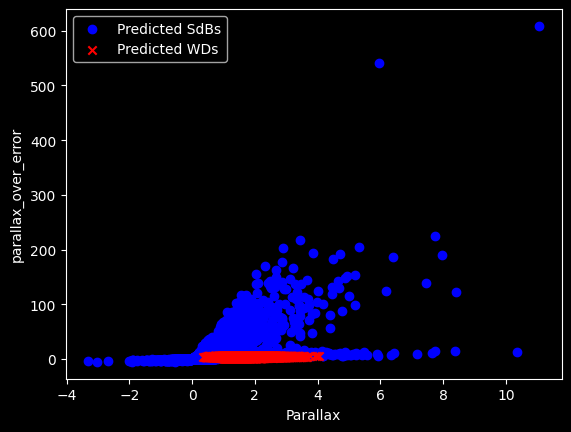

In [72]:
# Create a scatter plot for each class
plt.scatter(df_rick_unknown[key_sdb]['parallax'], df_rick_unknown[key_sdb]['parallax_over_error'], label='Predicted SdBs', c='blue', marker='o')
plt.scatter(df_rick_unknown[key_wd]['parallax'], df_rick_unknown[key_wd]['parallax_over_error'], label='Predicted WDs', c='red', marker='x')

# Set labels and legend
plt.xlabel('Parallax')
plt.ylabel('parallax_over_error')
plt.legend()

In [74]:
df_rick_unknown["reduced_pm"]=df_rick_unknown["phot_g_mean_mag"]+5*np.log10(df_rick_unknown["pm"])-10

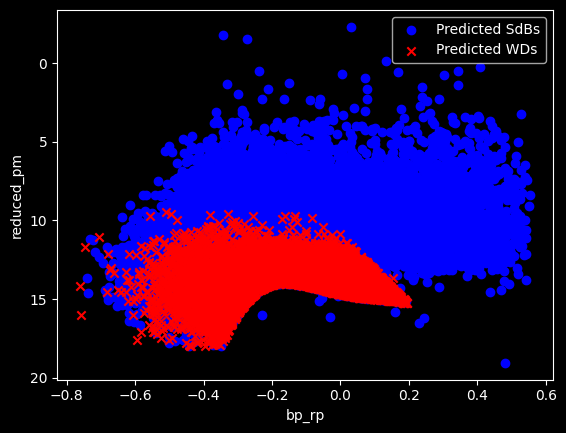

In [75]:
# Create a scatter plot for each class
plt.scatter(df_rick_unknown[key_sdb]['bp_rp'], df_rick_unknown[key_sdb]['reduced_pm'], label='Predicted SdBs', c='blue', marker='o')
plt.scatter(df_rick_unknown[key_wd]['bp_rp'], df_rick_unknown[key_wd]['reduced_pm'], label='Predicted WDs', c='red', marker='x')

# Set labels and legend
plt.xlabel('bp_rp')
plt.ylabel('reduced_pm')
plt.gca().invert_yaxis()
plt.legend()

# Now for Lysann's Stars

In [76]:
df_lys=pd.read_csv("../lysann_stars.csv")
df_lys=df_lys[X.columns]
# Count the number of NaN values per column
nan_count = df_lys.isna().sum()

# Display the count of NaN values per column
columns_with_high_nan_count = set(nan_count[nan_count > 1].index)
print(columns_with_high_nan_count)

set()


In [77]:
df_lys["pred"] = clf.predict(df_lys)
prob=clf.predict_proba(df_lys.drop(columns={"pred"}))
df_lys["sdb_proba"] = prob[:,0]
df_lys["wd_proba"] = prob[:,1]

In [79]:
key_lys_sdb=df_lys["pred"]==0
key_lys_wd=df_lys["pred"]==1
key_lys_sdb.value_counts()

True    104
Name: pred, dtype: int64

Text(0.5, 0, 'Probability')

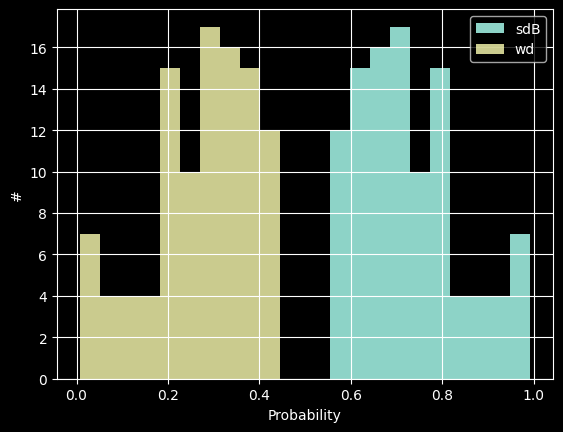

In [83]:
df_lys["sdb_proba"].hist()
df_lys["wd_proba"].hist(alpha=0.8)
plt.legend(["sdB","wd"])
plt.ylabel("#")
plt.xlabel("Probability")

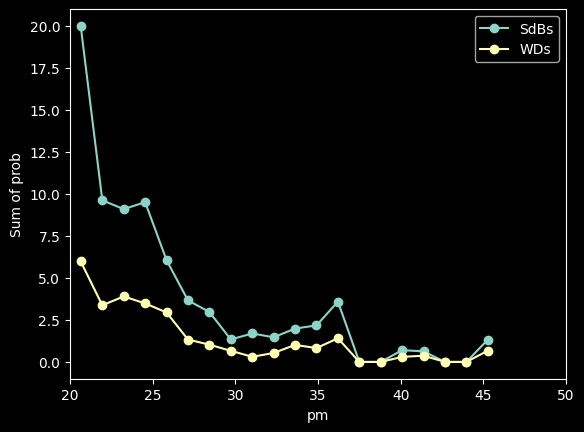

In [85]:
nbins = 20  # Adjust this to the desired number of bins
df_lys['pm_bin'] = pd.cut(df_lys['pm'], bins=nbins)
bin_sum = df_lys.groupby('pm_bin')['sdb_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
bin_sum = df_lys.groupby('pm_bin')['wd_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
plt.xlabel('pm')
plt.xlim(20,50)
plt.ylabel('Sum of prob')
plt.legend(["SdBs","WDs"])
plt.grid(False)
plt.show()

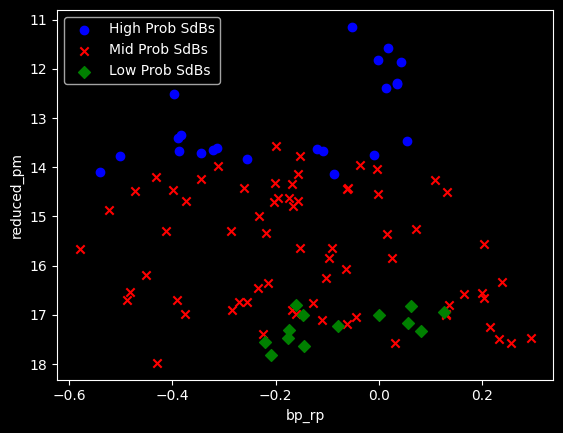

In [92]:
df_lys["reduced_pm"]=df_lys["phot_g_mean_mag"]+5*np.log10(df_lys["pm"])-10
# Create a scatter plot for each class
plt.scatter(df_lys[df_lys["sdb_proba"]>0.8]['bp_rp'], df_lys[df_lys["sdb_proba"]>0.8]['reduced_pm'], label='High Prob SdBs', c='blue', marker='o')
plt.scatter(df_lys[((df_lys["sdb_proba"]<0.8) & (df_lys["sdb_proba"]>0.6))]['bp_rp'], df_lys[((df_lys["sdb_proba"]<0.8) & (df_lys["sdb_proba"]>0.6))]['reduced_pm'], label='Mid Prob SdBs', c='red', marker='x')
plt.scatter(df_lys[df_lys["sdb_proba"]<0.6]['bp_rp'], df_lys[df_lys["sdb_proba"]<0.6]['reduced_pm'], label='Low Prob SdBs', c='g', marker='D')

# Set labels and legend
plt.xlabel('bp_rp')
plt.ylabel('reduced_pm')
plt.gca().invert_yaxis()
plt.legend()

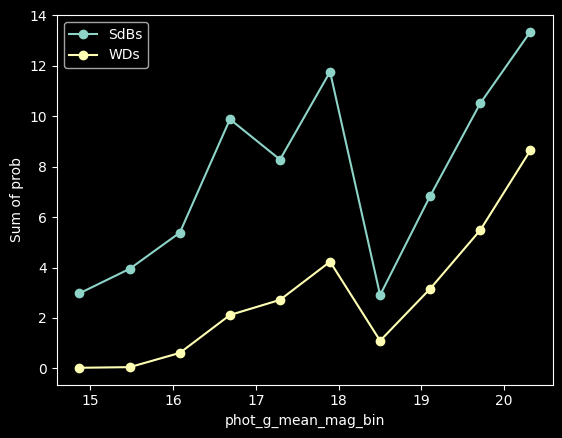

In [94]:
nbins = 10  # Adjust this to the desired number of bins
df_lys['phot_g_mean_mag_bin'] = pd.cut(df_lys['phot_g_mean_mag'], bins=nbins)
bin_sum = df_lys.groupby('phot_g_mean_mag_bin')['sdb_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
bin_sum = df_lys.groupby('phot_g_mean_mag_bin')['wd_proba'].sum()
bin_centers = [bin_.mid for bin_ in bin_sum.index.categories]
plt.plot(bin_centers, bin_sum, marker='o', linestyle='-')
plt.xlabel('phot_g_mean_mag_bin')
plt.ylabel('Sum of prob')
plt.legend(["SdBs","WDs"])
plt.grid(False)
plt.show()

In [99]:
X.columns

Index(['l', 'b', 'parallax', 'pmra', 'pmdec', 'phot_g_mean_mag',
       'phot_bp_mean_mag', 'phot_rp_mean_mag', 'ra_error', 'dec_error',
       'parallax_error', 'pmra_error', 'pmdec_error', 'ruwe',
       'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_n_bad_obs_al',
       'astrometric_n_good_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_obs_al', 'astrometric_sigma5d_max', 'bp_g', 'bp_rp',
       'dec_parallax_corr', 'dec_pmdec_corr', 'dec_pmra_corr', 'g_rp',
       'ipd_frac_multi_peak', 'ipd_frac_odd_win', 'ipd_gof_harmonic_amplitude',
       'ipd_gof_harmonic_phase', 'matched_transits', 'parallax_over_error',
       'parallax_pmdec_corr', 'parallax_pmra_corr', 'phot_bp_mean_flux',
       'phot_bp_mean_flux_error', 'phot_bp_mean_flux_over_error',
       'phot_bp_n_blended_transits', 'phot_bp_n_contaminated_transits',
       'phot_bp_n_obs', 'phot_bp_rp_excess_factor', 'phot_g_mean_flux',
       'phot_g_mean_flux_error'